# QEC

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Experiments pre-run

Codes:
+ XY
+ random XZ_YZ

Code sizes: 21
Max runs (not random): 20k (parallelize over 50 error probs)
Max runs (random): 2000    (parallelize over 50 realizations)
Realizations (random): 50
Bias: [0.5,100,infinite]
Chi: 16,20,24

#### Experiments run

Codes:
+ XY
+ random XY
+ random XZ
+ random XZ_YZ
+ XZZX
+ spiral
+ XZ 

Code sizes: [9,13,17,21]
Max runs (not random): 20k
Max runs (random): 2000
Realizations (random): 50
Bias: [0.5,10,100,1000,infinite]

In [39]:
M = 1000
bias = 10
L = 15

In [40]:
chilist = [8,12,16,20]


logical_failure_samples     = []
logical_failure_samples_std = []
logical_failure     = []
logical_failure_std = []

for chi in chilist:
    path = "data/rotXY_L"+str(L)+"_bias"+str(bias)+"_M"+str(M)+"_chi"+str(chi)+".pickle"
    data = pickle.load(open(path,"rb"))
    error_probability = data["error_probabilities"]
    nprobs = len(error_probability)
    
    success_list  = data["success_list"]
    coset_ps_list = data["coset_ps_list"]
    logical_commutations_list = data["logical_commutations_list"]
    tmp_samples = []
    tmp_samples_std = [] 
    tmp = []
    tmp_std = []
    for n in range(nprobs):
        success_data   = success_list[n]
        coset_ps_data  = coset_ps_list[n] 
        logical_commutations_data = logical_commutations_list[n]
        
        tmp_samples.append(1 - np.mean(success_data))
        tmp_samples_std.append(np.std(success_data)/np.sqrt(M-1))
        
        tmp1 = []
        counter = 0
        for k in range(M):
            coset_ps_point = coset_ps_data[k]
            coset_ps_point /= sum(coset_ps_point)
            if (coset_ps_point < -1e-20).any():
                counter+=1
            else:
                tmp1.append(np.max(coset_ps_point))
                #coset_ps_point2 = np.reshape(coset_ps_point,(2,2))
                #max_coset = np.where(coset_ps_point == np.amax(coset_ps_point))[0][0]
                #if (logical_commutations_data[k] == [0,0]).all():
                #    newtmp.append(np.max(coset_ps_point))
                #elif (logical_commutations_data[k] == [0,1]).all():
                #    
                #    newtmp.append()
    
        tmp1 = np.asarray(tmp1)
        #newtmp = np.asarray(newtmp)
        #print(counter)
        tmp.append(1 - np.mean(tmp1))
        tmp_std.append(np.std(tmp1)/np.sqrt(len(tmp1)-1))
    logical_failure_samples.append(tmp_samples)
    logical_failure_samples_std.append(tmp_samples_std)
    logical_failure.append(tmp)
    logical_failure_std.append(tmp_std)
    
    
    
        #newlogical_failure8.append(1 - np.mean(newtmp))
        #newlogical_failure8_std.append(np.std(newtmp)/np.sqrt(len(newtmp)-1))

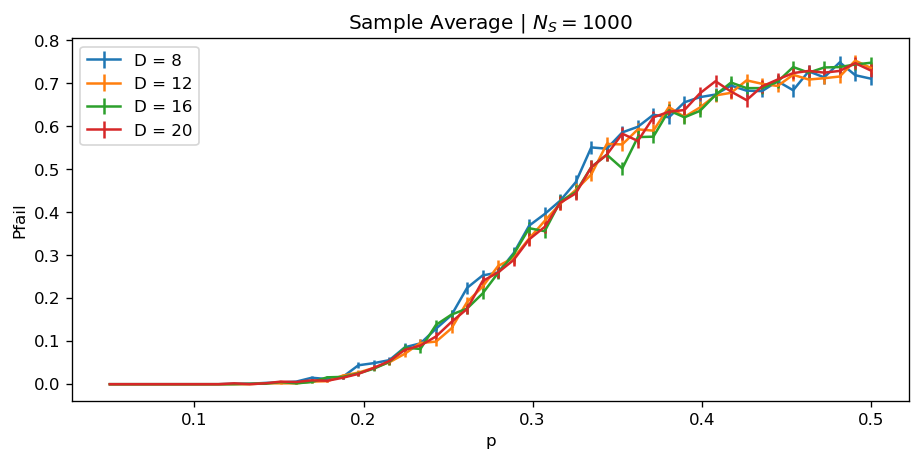

In [41]:
fig = plt.figure(1,figsize=(9,4), dpi=120, facecolor='w', edgecolor='k')
plt.title("Sample Average | $N_S=1000$")
for k in range(len(chilist)):
    plt.errorbar(error_probability, logical_failure_samples[k], logical_failure_samples_std[k],
                label = "D = " + str(chilist[k]))
plt.xlabel("p")
plt.ylabel("Pfail")
plt.legend()
plt.show()

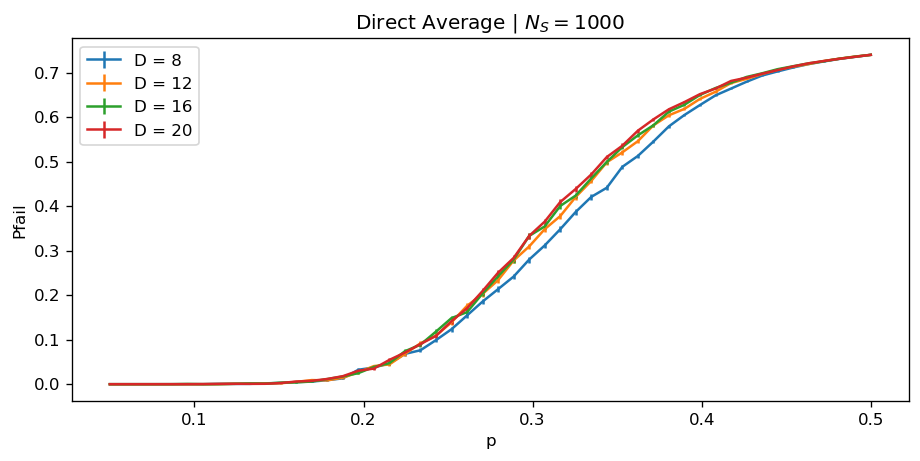

In [42]:
fig = plt.figure(1,figsize=(9,4), dpi=120, facecolor='w', edgecolor='k')
plt.title("Direct Average | $N_S=1000$")
for k in range(len(chilist)):
    plt.errorbar(error_probability, logical_failure[k], logical_failure_std[k],
                label = "D = " + str(chilist[k]))
plt.xlabel("p")
plt.ylabel("Pfail")
plt.legend()
plt.show()

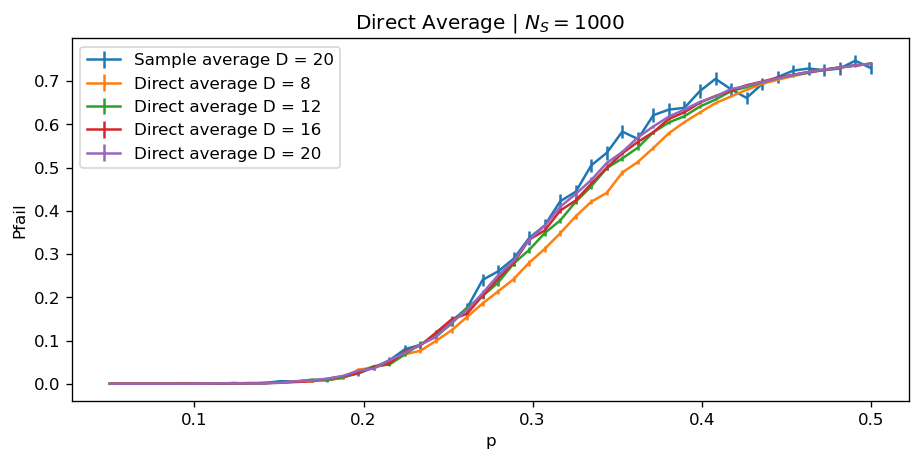

In [43]:
fig = plt.figure(1,figsize=(9,4), dpi=120, facecolor='w', edgecolor='k')
plt.title("Direct Average | $N_S=1000$")
plt.errorbar(error_probability, logical_failure_samples[-1], logical_failure_samples_std[k-1], 
             label = "Sample average D = 20")
for k in range(len(chilist)):
    plt.errorbar(error_probability, logical_failure[k], logical_failure_std[k],
                label = "Direct average D = " + str(chilist[k]))
plt.xlabel("p")
plt.ylabel("Pfail")
plt.legend()
plt.show()